In [131]:
''' !pip install torch
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib 
!pip install category-encoders '''

' !pip install torch\n!pip install numpy\n!pip install pandas\n!pip install seaborn\n!pip install matplotlib \n!pip install category-encoders '

In [166]:
import numpy as np 
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from category_encoders.binary import BinaryEncoder
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

from torch import nn
from torch.utils.data import DataLoader, Dataset

In [188]:
df = pd.read_csv('/Users/alexk/Desktop/datathon/credit_card_transactions-ibm_v2.csv')

In [189]:
print(df.columns)
df.rename(columns = {'Use Chip':'Method', 'Merchant Name':'Name', 'Merchant City': 'City', 'Merchant State': 'State','Errors?':'Error', 'Is Fraud?':'Fraud'}, inplace = True)
df = df.drop(columns = ['Method', 'Name', 'City', 'State', 'Zip', 'Error'])
df = df.dropna()
df.head()

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?'],
      dtype='object')


,User,Card,Year,Month,Day,Time,Amount,MCC,Fraud
0,0,0,2002,9,1,06:21,$134.09,5300,No
1,0,0,2002,9,1,06:42,$38.48,5411,No
2,0,0,2002,9,2,06:22,$120.34,5411,No
3,0,0,2002,9,2,17:45,$128.95,5651,No
4,0,0,2002,9,3,06:23,$104.71,5912,No


(0, 9)
Fraud: (0, 9), Not Fraud: (0, 9)
Total data size: (0, 9)


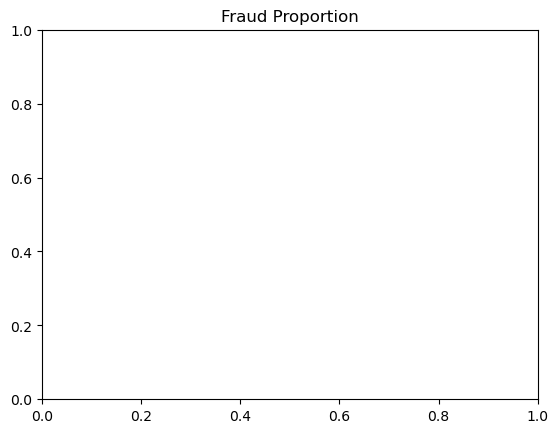

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [192]:
from sklearn.model_selection import train_test_split
print(df.shape)
df_yf = df[df['Fraud'] == 1]
df_nf = df[df['Fraud'] == 0].iloc[:df_yf.shape[0]]
print(f"Fraud: {df_yf.shape}, Not Fraud: {df_nf.shape}")

df = pd.concat([df_yf, df_nf])

print(f"Total data size: {df.shape}")
sns.countplot(data = df, x = 'Fraud')
plt.title("Fraud Proportion")
plt.show()

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train.head(50)

In [182]:
df.describe()

,User,Card,Year,Month,Day,MCC,Fraud
count,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000
mean,505.702877,1.776053,2011.561028,6.617149,15.771449,5446.459673,0.500000
std,641.700988,1.373095,4.787141,3.471335,8.855535,945.855942,0.500004
min,0.000000,0.000000,1996.000000,1.000000,1.000000,1711.000000,0.000000
25%,0.000000,1.000000,2008.000000,4.000000,8.000000,5300.000000,0.000000
50%,2.000000,2.000000,2012.000000,7.000000,16.000000,5411.000000,0.500000
75%,1020.000000,3.000000,2016.000000,10.000000,23.000000,5814.000000,1.000000
max,1997.000000,8.000000,2020.000000,12.000000,31.000000,9402.000000,1.000000


In [191]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop('Fraud', axis=1)
y = df['Fraud']

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (0, 8)
'y' shape: (0,)


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

ValueError: could not convert string to float: '$287.13'

<Figure size 2000x1000 with 0 Axes>

In [140]:
df.head(10)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
28882,2,0,2009,9,26,01:56,$948.44,Online Transaction,3694722044710185708,ONLINE,NaN,NaN,4722,NaN,No
28883,2,0,2009,10,1,04:13,$42.98,Online Transaction,-6458444334611773637,ONLINE,NaN,NaN,4784,NaN,No
28884,2,0,2009,10,1,10:49,$9.85,Swipe Transaction,-4891055843221560993,West Covina,CA,91792.0,5411,NaN,No
28885,2,0,2009,10,1,14:30,$36.39,Online Transaction,-6458444334611773637,ONLINE,NaN,NaN,4784,NaN,No
28886,2,0,2009,10,2,04:25,$56.60,Online Transaction,-6458444334611773637,ONLINE,NaN,NaN,4784,NaN,No
28887,2,0,2009,10,2,14:30,$20.86,Online Transaction,-6458444334611773637,ONLINE,NaN,NaN,4784,NaN,No
28888,2,0,2009,10,3,06:45,$74.71,Swipe Transaction,1111128973710816778,West Covina,CA,91792.0,5300,NaN,No
28889,2,0,2009,10,3,09:57,$61.47,Online Transaction,-6458444334611773637,ONLINE,NaN,NaN,4784,NaN,No
28890,2,0,2009,10,3,10:57,$11.41,Swipe Transaction,2027553650310142703,West Covina,CA,91792.0,5541,NaN,No
28891,2,0,2009,10,4,14:31,$50.77,Online Transaction,-6458444334611773637,ONLINE,NaN,NaN,4784,NaN,No


In [141]:
#number of fraudulent transactions
df['Is Fraud?'].value_counts()

Is Fraud?
No     9676336
Yes      11729
Name: count, dtype: int64

In [142]:
# Check missing value by column
df.isnull().sum()

User                    0
Card                    0
Year                    0
Month                   0
Day                     0
Time                    0
Amount                  0
Use Chip                0
Merchant Name           0
Merchant City           0
Merchant State    1132934
Zip               1197293
MCC                     0
Errors?           9532311
Is Fraud?               0
dtype: int64

2. Data cleaning

In [143]:
df.Amount.head(5)

28882    $948.44
28883     $42.98
28884      $9.85
28885     $36.39
28886     $56.60
Name: Amount, dtype: object

In [144]:
# We need to strip the '$' from the Amount to cast as a float
df["Amount"]=df["Amount"].str.replace("$","").astype(float)

In [145]:
df.Amount.head(5)

28882    948.44
28883     42.98
28884      9.85
28885     36.39
28886     56.60
Name: Amount, dtype: float64

In [146]:
df.Time.head(5)

28882    01:56
28883    04:13
28884    10:49
28885    14:30
28886    04:25
Name: Time, dtype: object

In [147]:
# Extract the hour and minute to perform a more refined time series analysis
df["Hour"] = df["Time"].str [0:2]
df["Minute"] = df["Time"].str [3:5]
df = df.drop(['Time'],axis=1)

In [148]:
# change the is fraud column to binary 
df["Is Fraud?"] = df["Is Fraud?"].apply(lambda x: 1 if x == 'Yes' else 0)

3. Exploratory Data Analysis

In [149]:
fraud_data = df[df['Is Fraud?'] == 1]

(1) Transaction amount

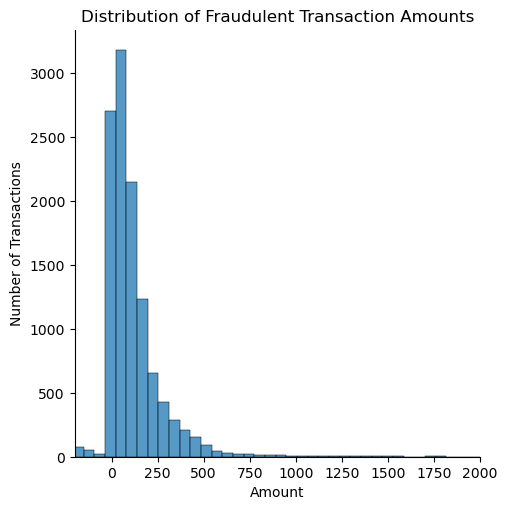

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(fraud_data['Amount'].astype(float), kde=False, bins=80)
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim(-200, 2000)
plt.show()

(2) Geographical distribution

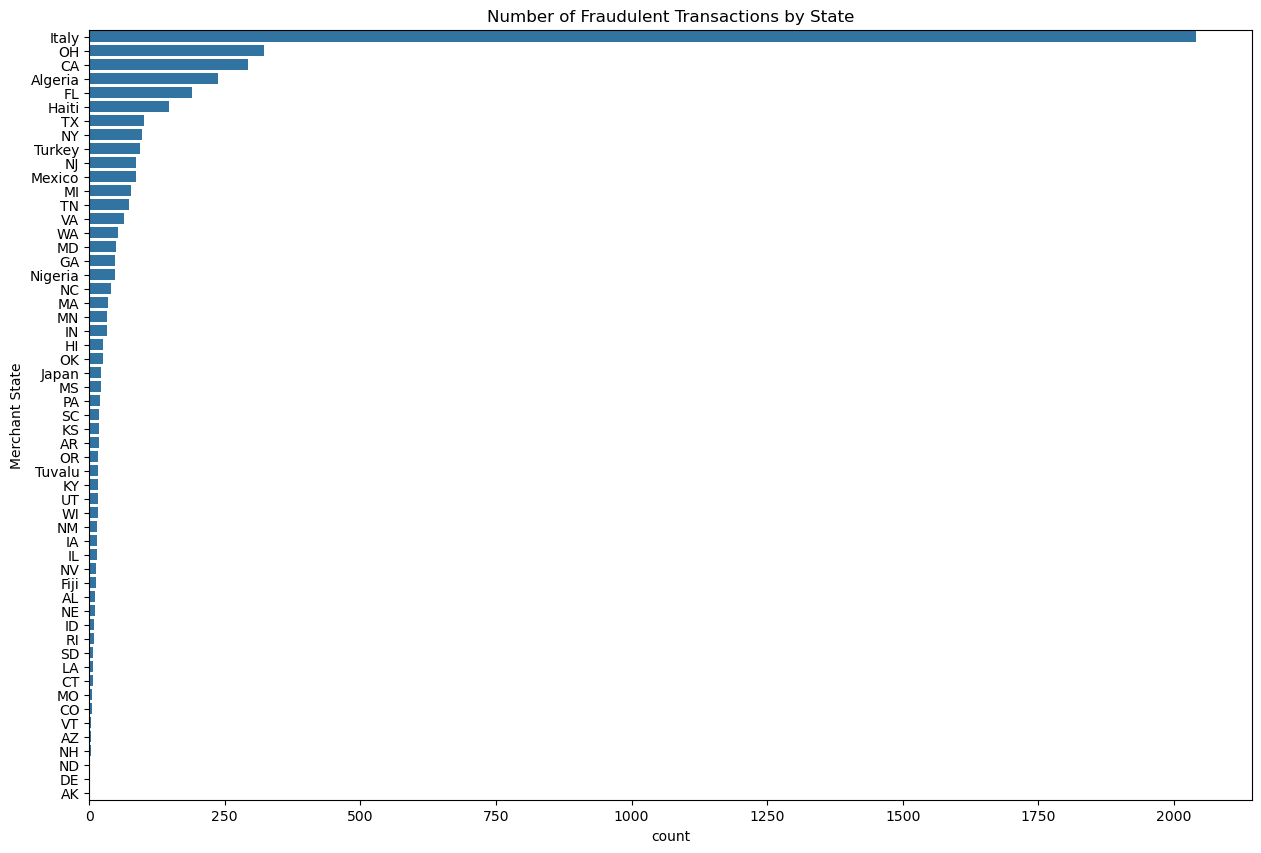

In [151]:
plt.figure(figsize=(15, 10))  
sns.countplot(data=fraud_data, y='Merchant State', order=fraud_data['Merchant State'].value_counts().index)
plt.title('Number of Fraudulent Transactions by State')
plt.show()

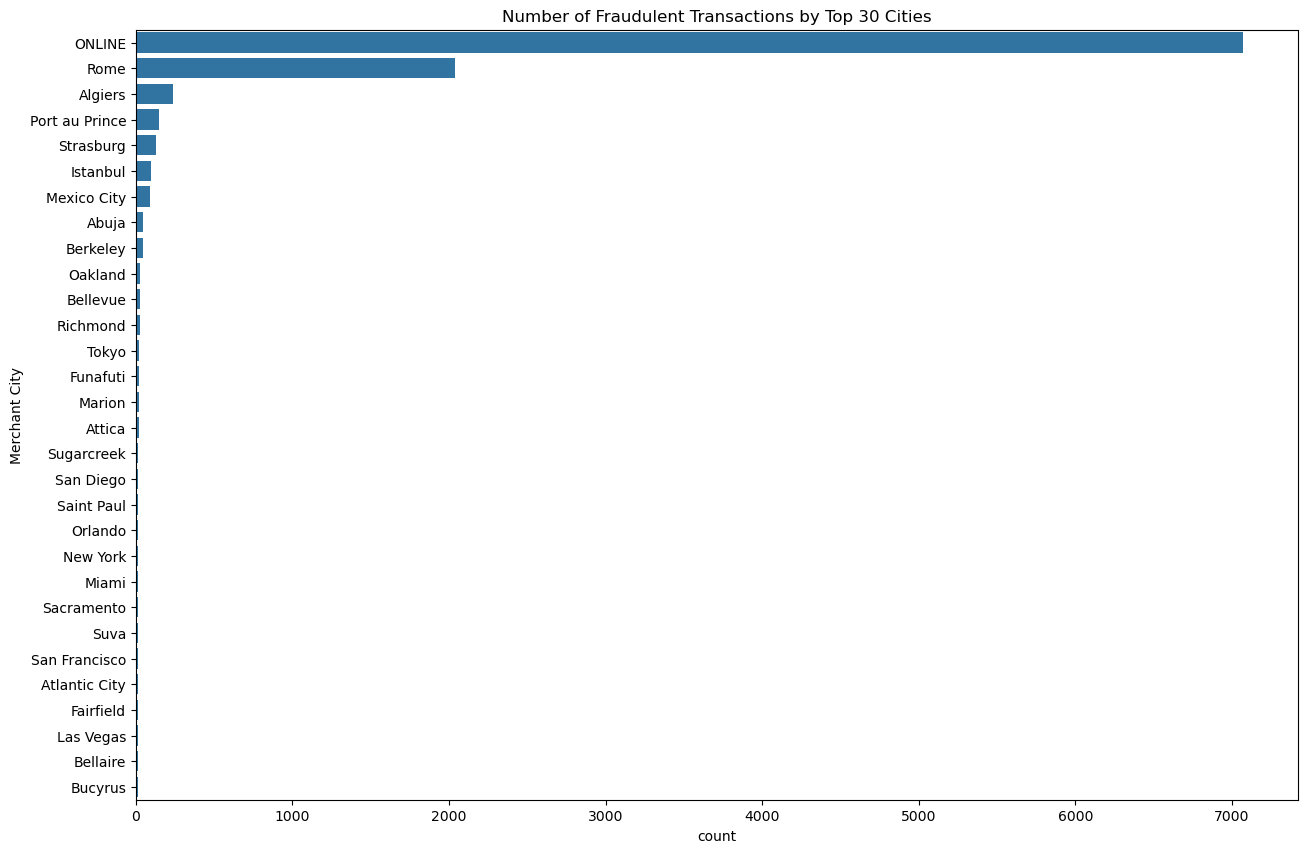

In [152]:
plt.figure(figsize=(15, 10))
top_cities = fraud_data['Merchant City'].value_counts().head(30).index
sns.countplot(data=fraud_data, y='Merchant City', order=top_cities)
plt.title('Number of Fraudulent Transactions by Top 30 Cities')
plt.show()

(3) Time variation

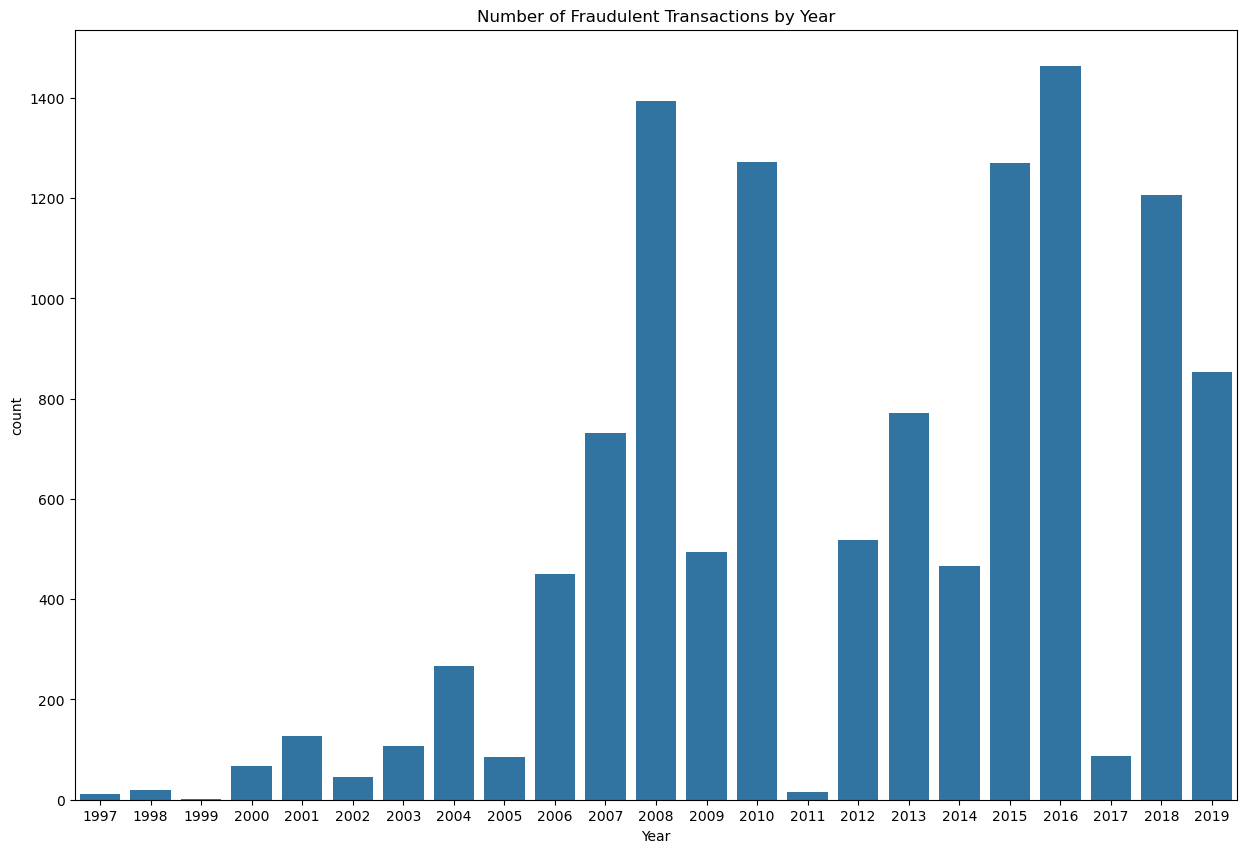

In [153]:
plt.figure(figsize=(15, 10))
sns.countplot(data=fraud_data, x='Year')
plt.title('Number of Fraudulent Transactions by Year')
plt.show()

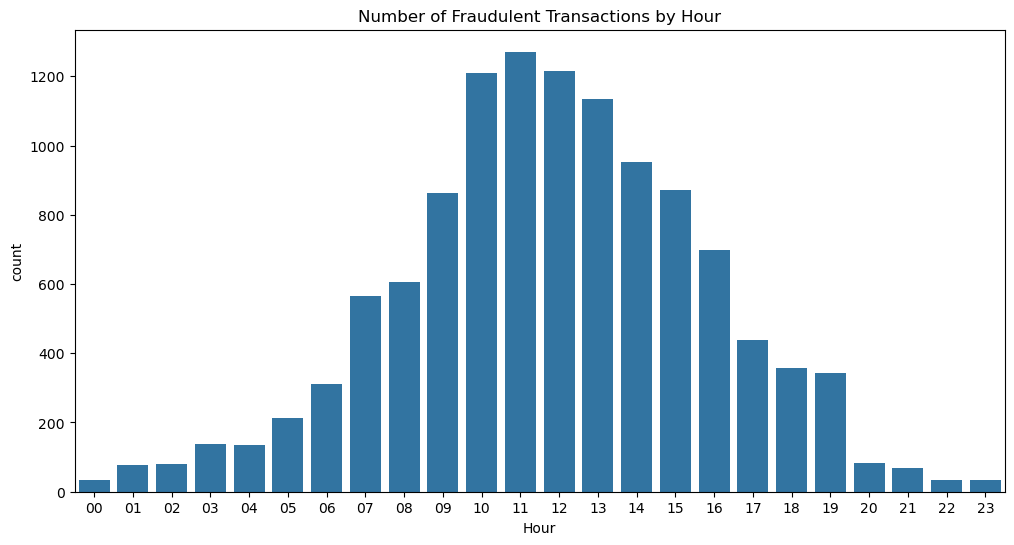

In [154]:
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud_data, x='Hour', order=sorted(fraud_data['Hour'].unique()))
plt.title('Number of Fraudulent Transactions by Hour')
plt.show()

C:\Users\alexk\AppData\Local\Temp\ipykernel_22016\678193434.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, x='Day of Week', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette="Blues_d")


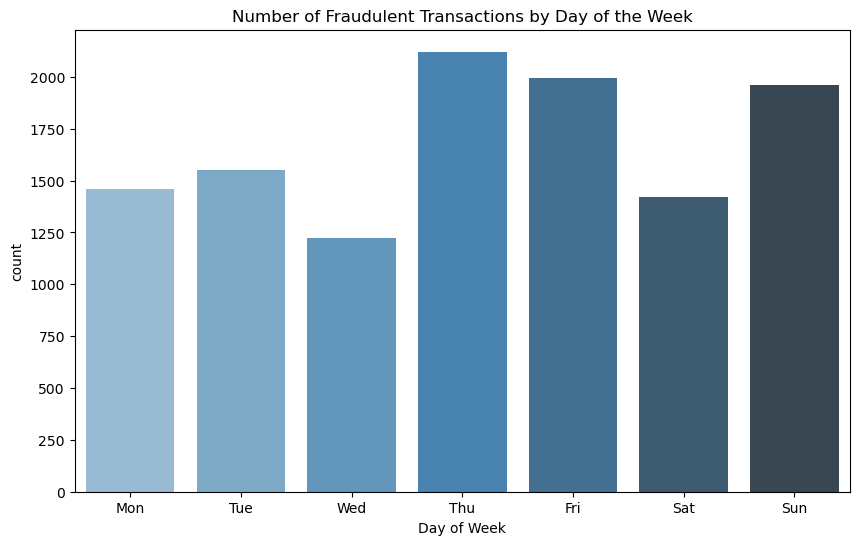

In [155]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Extract day of the week and map it to its name
days = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Date'].dt.dayofweek.map(days)

fraud_data = df[df['Is Fraud?'] == 1]

# Visualize
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data, x='Day of Week', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette="Blues_d")
plt.title('Number of Fraudulent Transactions by Day of the Week')
plt.show()

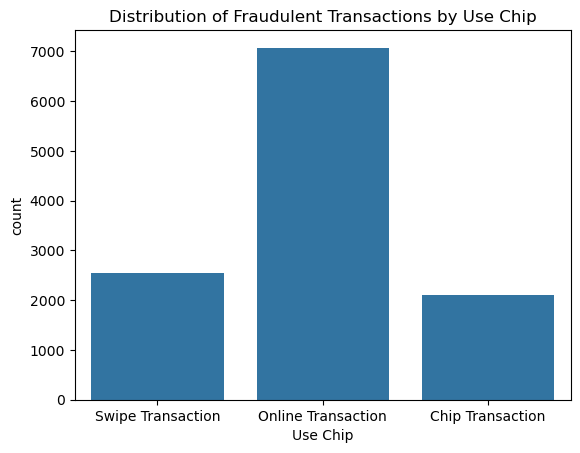

In [93]:
sns.countplot(data=fraud_data, x='Use Chip')
plt.title('Distribution of Fraudulent Transactions by Use Chip')
plt.show()

4. Fraud Detection with Machine Learning (Support Vector Machine)

In [156]:
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

def clean(df):
    # Convert data type
    df['Hour'] = df['Hour'].astype('float')
    
    # Scale the "Amount" column
    scaler = StandardScaler()
    df['Amount'] = scaler.fit_transform(df[['Amount']])
   
    # Binary encoding for categorical variables
    cat_col = ['Use Chip', 'Day of Week']
    for col in cat_col:
        if col in df.columns:
            be = ce.BinaryEncoder(drop_invariant=False)
            enc_df = pd.DataFrame(be.fit_transform(df[col]), dtype='int8')
            df = pd.concat([df, enc_df], axis=1)
            df.drop([col], axis=1, inplace=True)
    
    for col in df.columns:
        df[col] = df[col].astype(float)
        
    return df

# Create the pipeline
preprocessing_pipeline = Pipeline([
    ('cleaning', FunctionTransformer(clean, validate=False)), 
], verbose=True)

df_transformed = preprocessing_pipeline.fit_transform(df)

ValueError: could not convert string to float: 'ONLINE'

Sample size adjustment

(9688065, 18)
Fraud: (11729, 18), Not Fraud: (11729, 18)
Total data size: (23458, 18)


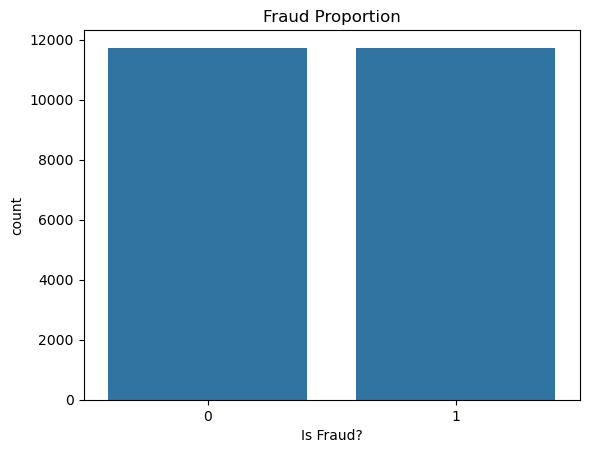

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hour,Minute,Date,Day of Week
34749,2,0,2017,5,7,-0.362221,Chip Transaction,-5475680618560174533,Spring Valley,CA,91977.0,5942,NaN,0,6.0,45,2017-05-07,Sun
38457,2,1,2003,4,2,-0.132013,Swipe Transaction,1111128973710816778,West Covina,CA,91792.0,5300,NaN,0,6.0,27,2003-04-02,Wed
16857768,1370,2,2014,3,30,1.250821,Online Transaction,1698045825511338540,ONLINE,NaN,NaN,7922,NaN,1,15.0,56,2014-03-30,Sun
13550726,1106,0,2015,11,2,0.777216,Online Transaction,1913477460590765860,ONLINE,NaN,NaN,5300,NaN,1,10.0,45,2015-11-02,Mon
1054964,81,0,2010,9,9,-6.367407,Online Transaction,-1007477596717646975,ONLINE,NaN,NaN,3780,NaN,1,2.0,57,2010-09-09,Thu
33780,2,0,2015,12,20,0.106132,Online Transaction,-6458444334611773637,ONLINE,NaN,NaN,4784,NaN,0,4.0,21,2015-12-20,Sun
36188,2,0,2019,7,7,0.097950,Online Transaction,-6458444334611773637,ONLINE,NaN,NaN,4784,NaN,0,14.0,30,2019-07-07,Sun
37837,2,1,2002,11,29,0.019423,Online Transaction,-6458444334611773637,ONLINE,NaN,NaN,4784,NaN,0,8.0,41,2002-11-29,Fri
38747,2,1,2003,5,25,1.961595,Online Transaction,333722291367506728,ONLINE,NaN,NaN,4722,NaN,0,13.0,33,2003-05-25,Sun
31119,2,0,2012,8,13,0.132634,Online Transaction,-6458444334611773637,ONLINE,NaN,NaN,4784,NaN,0,14.0,56,2012-08-13,Mon


In [157]:
from sklearn.model_selection import train_test_split
print(df.shape)
df_yf = df[df['Is Fraud?'] == 1]
df_nf = df[df['Is Fraud?'] == 0].iloc[:df_yf.shape[0]]
print(f"Fraud: {df_yf.shape}, Not Fraud: {df_nf.shape}")

df = pd.concat([df_yf, df_nf])

print(f"Total data size: {df.shape}")
sns.countplot(data = df, x = 'Is Fraud?')
plt.title("Fraud Proportion")
plt.show()

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train.head(50)

In [158]:
df = df.drop(columns = ['Use Chip'])
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'Algiers'

<Figure size 2000x1000 with 0 Axes>

In [127]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop('Is Fraud?', axis=1)
y = df['Is Fraud?']

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (23458, 5)
'y' shape: (23458,)


In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [130]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 41.47%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.396083     0.428064  0.414738      0.412074      0.412117
recall        0.330972     0.498056  0.414738      0.414514      0.414738
f1-score      0.360612     0.460415  0.414738      0.410514      0.410648
support    8188.000000  8232.000000  0.414738  16420.000000  16420.000000
_______________________________________________
Confusion Matrix: 
 [[2710 5478]
 [4132 4100]]

Test Result:
Accuracy Score: 42.01%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.409152     0.428185  0.420148     0.418669      0.418609
recall        0.343406     0.497855  0.420148     0.420631      0.420148
f1-score      0.373407     0.460399  0.420148     0.416903      0.416631
support    3541.000000  349

C:\Users\alexk\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
